---
CSC 268 Lab 3: Interpolation
---

This lab sets up some simple image resampling examples.  You will continue with more like this on the second homework.

We begin by importing packages and loading an image to work with.

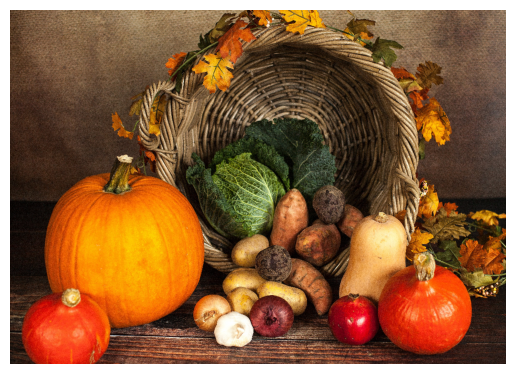

(829, 1161, 3)
float64


In [1]:
import cv2 as cv
import numpy as np
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='gray')
import math

def imshow(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
harvest = cv.imread('harvest.jpg',cv.IMREAD_COLOR)[0::4,0::4,[2,1,0]]/255.0
imshow(harvest)
print(harvest.shape)
print(harvest.dtype)

Now let's set up matrices that will hold a grid of points representing the pixel coordinates.  We'll have two matrices, one to hold the x coordinate and one to hold the y coordinate.  You may recall that we did something like this in lab 3 -- review that if you don't remember how it was done.

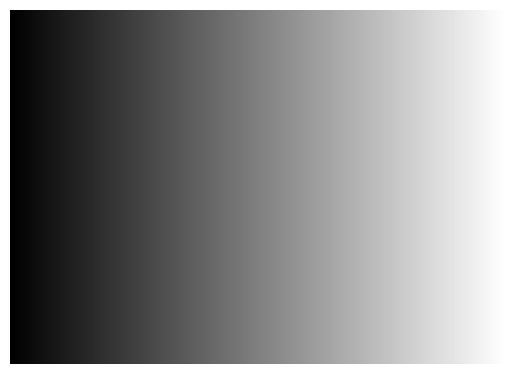

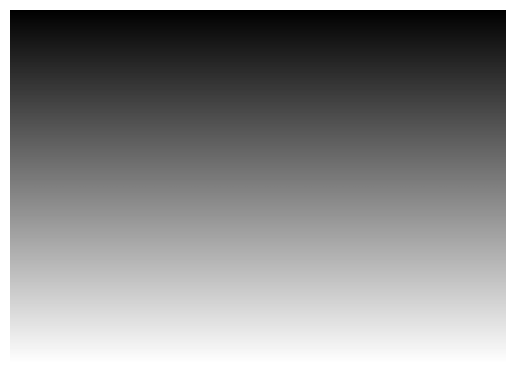

In [2]:
n_rows,n_cols,n_clr = harvest.shape
px = np.array(range(n_cols))
#print(px.shape)
pxg = np.tile(px.reshape(1,-1),(n_rows,1))
#print(px.shape)
imshow(pxg/px.max())
py = np.array(range(n_rows))
#print(py.shape)
pyg = np.tile(py.reshape(-1,1),(1,n_cols))
#print(py.shape)
imshow(pyg/py.max())

NumPy also offers a shortcut for creating the grid matrices, called `meshgrid`.

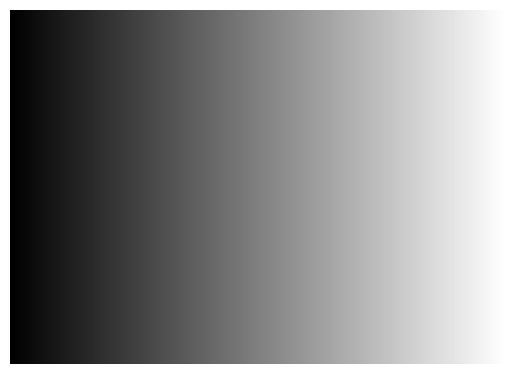

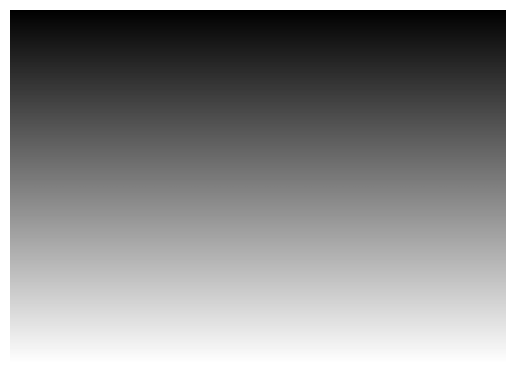

In [3]:
pxg,pyg = np.meshgrid(px, py, indexing='xy')
imshow(pxg/px.max())
imshow(pyg/py.max())

The matrices we just created are the coordinates for the original images.  If we want to apply a transformation to our image, the next step is to compute new coordinates for the transformed points.  We can put the existing coordinates into a matrix of homogeneous column vectors, and multiply them by a transformation matrix.  The plot shows the grid of original points in blue, and the new (transformed) points in cyan.

(3, 962469)


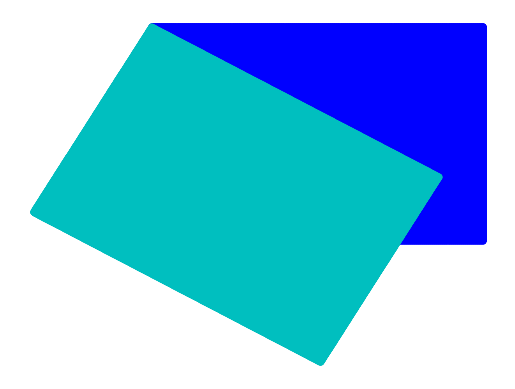

In [4]:
pvec = np.stack((pxg.ravel(),pyg.ravel(),np.ones(pxg.size,dtype=np.float64)))
print(pvec.shape)
theta = 30*math.pi/180  # must be in radians
R = np.array([[math.cos(theta),-math.sin(theta),0],[math.sin(theta),math.cos(theta),0],[0,0,1]])
tvec = np.matmul(R,pvec)

plt.plot(pvec[0,:],pvec[1,:],'b.')
plt.plot(tvec[0,:],tvec[1,:],'c.')
plt.gca().invert_yaxis()  # invert y axis to match image coordinate system
plt.axis('off')
plt.show()

To do interpolation, we create a `RegularGridInterpolator` object from the SciPy package.  We can then pass it coordinates for points we want interpolated.  If a point is outside the grid of known points, our object will return 0.  Look at the result.  Do you see how it represents a view of the blue rectangle, as seen through the cyan rectangle?

(829, 1161, 3)


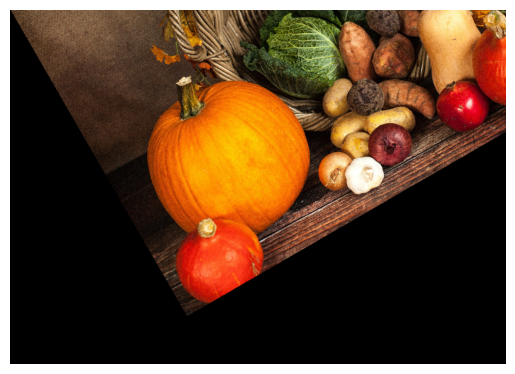

In [5]:
interp = RegularGridInterpolator((py,px), harvest, bounds_error=False, fill_value=0.0)
tx = tvec[0,:].reshape(pxg.shape)
ty = tvec[1,:].reshape(pyg.shape)
pd = interp((ty,tx))
print(pd.shape)
imshow(pd)

Note that the rotation is around the coordinate system origin, which is at the upper left given the coordinates we have chosen.  We could change that by altering `pxg` and `pyg` accordingly.

(3, 962469)


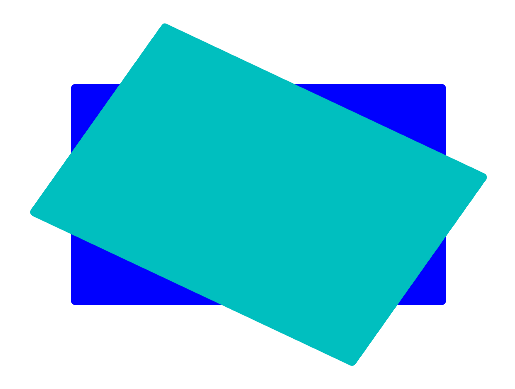

(829, 1161, 3)


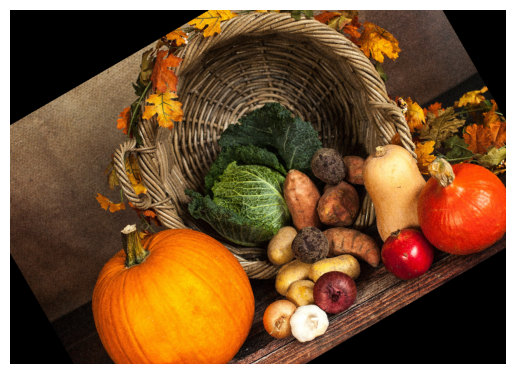

In [6]:
px2 = np.array(range(n_cols))-(n_cols-1)/2
py2 = np.array(range(n_rows))-(n_rows-1)/2
pxg2,pyg2 = np.meshgrid(px2, py2, indexing='xy')
pvec2 = np.stack((pxg2.ravel(),pyg2.ravel(),np.ones(pxg.size,dtype=np.float64)))
print(pvec2.shape)
theta = 30*math.pi/180  # must be in radians
R = np.array([[math.cos(theta),-math.sin(theta),0],[math.sin(theta),math.cos(theta),0],[0,0,1]])
tvec2 = np.matmul(R,pvec2)
plt.plot(pvec2[0,:],pvec2[1,:],'b.')
plt.plot(tvec2[0,:],tvec2[1,:],'c.')
plt.gca().invert_yaxis()  # invert y axis to match image coordinate system
plt.axis('off')
plt.show()
interp = RegularGridInterpolator((py2,px2), harvest, bounds_error=False, fill_value=0.0)
tx2 = tvec2[0,:].reshape(pxg.shape)
ty2 = tvec2[1,:].reshape(pyg.shape)
pd2 = interp((ty2,tx2))
print(pd2.shape)
imshow(pd2)

Your task:  using the interpolator above, create a new set of transformed points that are both rotated and shrunk.  Try to pick a shrinkage value so that the tranformed points just fit inside the original points -- there will be no black areas in the resulting image.

(3, 962469)


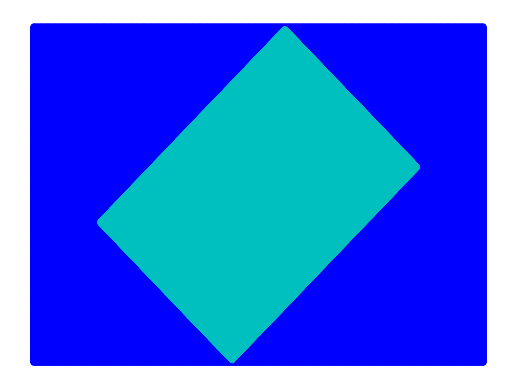

(829, 1161, 3)


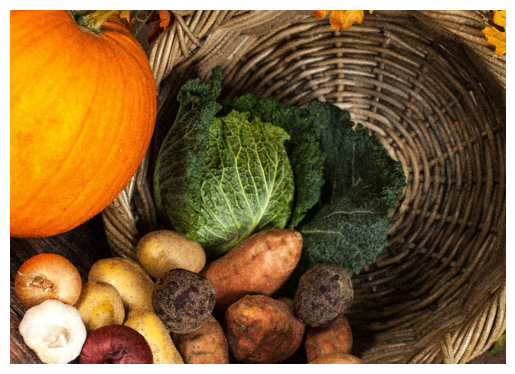

In [10]:
# TODO: create a new set of points that is both rotated by 45 degrees and shrunk to 70% size
# Hint:  you will need to apply a scaling matrix in addition to the appropriate rotation
px3 = np.array(range(n_cols))-(n_cols-1)/2
py3 = np.array(range(n_rows))-(n_rows-1)/2
pxg3,pyg3 = np.meshgrid(px3, py3, indexing='xy')
pvec3 = np.stack((pxg3.ravel(),pyg3.ravel(),np.ones(pxg.size,dtype=np.float64)))
print(pvec3.shape)
theta = -45*math.pi/180  # must be in radians
T = np.array([[math.cos(theta),-math.sin(theta),0],[math.sin(theta),math.cos(theta),0],[0,0,1]])*0.58
tvec3 = np.matmul(T,pvec3)
plt.plot(pvec3[0,:],pvec3[1,:],'b.')
plt.plot(tvec3[0,:],tvec3[1,:],'c.')
plt.gca().invert_yaxis()  # invert y axis to match image coordinate system
plt.axis('off')
plt.show()
interp = RegularGridInterpolator((py3,px3), harvest, bounds_error=False, fill_value=0.0)
tx3 = tvec3[0,:].reshape(pxg.shape)
ty3 = tvec3[1,:].reshape(pyg.shape)
pd3 = interp((ty3,tx3))
print(pd3.shape)
imshow(pd3)